In [1]:
import src.visualization.visualize as viz
import src.features.build_features as bf

In [2]:
reducto_table = bf.get_reducto_reports_table()
reducto_table.describe()

,lines,source_lines,blank_lines,docstring_lines,comment_lines,average_function_length,number_of_functions,source_files
count,3.647000e+03,3.647000e+03,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000
mean,1.402416e+04,9.545457e+03,1627.766109,2069.450233,781.485056,12.858514,534.454894,49.217987
std,8.349239e+04,5.984216e+04,9296.191124,18596.750779,3920.814374,40.615570,2418.541991,274.131266
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.505000e+02,3.015000e+02,65.000000,24.000000,14.000000,6.000000,21.000000,3.000000
50%,1.603000e+03,1.077000e+03,224.000000,135.000000,71.000000,9.000000,81.000000,8.000000
75%,6.487000e+03,4.250500e+03,827.000000,662.500000,323.500000,14.000000,290.000000,28.000000
max,3.424155e+06,2.595086e+06,409215.000000,682666.000000,120610.000000,1562.000000,71735.000000,11315.000000


<AxesSubplot:xlabel='lines', ylabel='Count'>

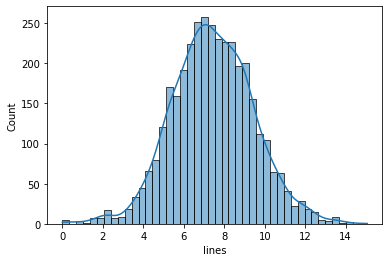

In [11]:
import numpy as np
log_lines = reducto_table['lines'].apply(np.log)
import seaborn as sns
sns.histplot(log_lines, kde=True)
#https://stackoverflow.com/questions/41940726/scipy-lognorm-fitting-to-histogram  # Review histplot

In [8]:
log_lines.mean()
np.exp(7.430112972227527)

1685.9980335615614